# LightBGM应用

In [1]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
# 加载数据集
breast = load_breast_cancer()
# 获取特征值和目标指
X,y = breast.data,breast.target
# 获取特征名称
feature_name = breast.feature_names

In [3]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 数据格式转换
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
# 参数设置
boost_round = 50 # 迭代次数              
early_stop_rounds = 10 # 验证数据若在early_stop_rounds轮中未提高，则提前停止

params = {
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [6]:
# 模型训练:加入提前停止的功能
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_eval, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results)

[1]	train's auc: 0.94953	train's l2: 0.762479	validate's auc: 0.95443	validate's l2: 0.731322
Train until valid scores didn't improve in 10 rounds.
[2]	train's auc: 0.963417	train's l2: 0.728926	validate's auc: 0.964433	validate's l2: 0.699406
[3]	train's auc: 0.98023	train's l2: 0.697226	validate's auc: 0.98444	validate's l2: 0.669713
[4]	train's auc: 0.979143	train's l2: 0.66695	validate's auc: 0.983963	validate's l2: 0.639856
[5]	train's auc: 0.980021	train's l2: 0.638529	validate's auc: 0.983963	validate's l2: 0.613014
[6]	train's auc: 0.981829	train's l2: 0.611936	validate's auc: 0.98301	validate's l2: 0.588542
[7]	train's auc: 0.985601	train's l2: 0.586151	validate's auc: 0.988568	validate's l2: 0.563377
[8]	train's auc: 0.986311	train's l2: 0.562219	validate's auc: 0.98825	validate's l2: 0.541396
[9]	train's auc: 0.986959	train's l2: 0.539217	validate's auc: 0.990156	validate's l2: 0.518326
[10]	train's auc: 0.987126	train's l2: 0.517841	validate's auc: 0.991108	validate's l2: 0

In [7]:
# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred

array([ 0.1931303 ,  0.53418087,  0.57603579,  0.50099789,  0.55426404,
        0.55102906,  0.51473063,  0.53329354,  0.53329354,  0.59311616,
        0.25982204,  0.49573711,  0.53921752,  0.24239056,  0.28271959,
        0.02524547,  0.51844824,  0.02524547,  0.02524547,  0.02524547,
        0.07855282,  0.02524547,  0.4593166 ,  0.55270372,  0.02524547,
        0.58934934,  0.58934934,  0.1931303 ,  0.57603579,  0.02524547,
        0.58934934,  0.02524547,  0.50141707,  0.16518063,  0.58048329,
        0.1931303 ,  0.55361517,  0.16518063,  0.57980261,  0.02524547,
        0.36036456,  0.59311616,  0.23862374,  0.58934934,  0.32473473,
        0.02524547,  0.58934934,  0.52884603,  0.55935125,  0.02524547,
        0.02524547,  0.07855282,  0.16518063,  0.53577178,  0.54302601,
        0.58048329,  0.53706036,  0.54215959,  0.54215959,  0.02524547,
        0.1931303 ,  0.02524547,  0.59311616,  0.56069689,  0.02524547,
        0.54592641,  0.02524547,  0.02524547,  0.02524547,  0.53

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: more than one metric available, picking one to plot.
  from ipykernel import kernelapp as app


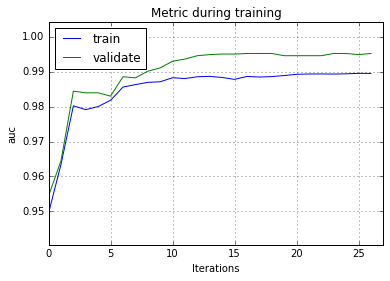

In [8]:
# 模型评估
lgb.plot_metric(results)
plt.show()

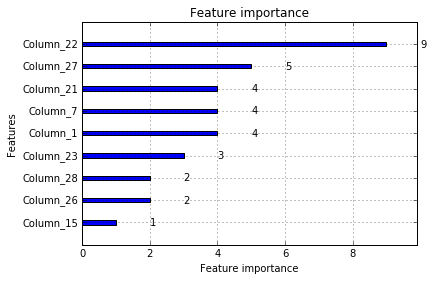

In [9]:
# 绘制重要的特征
lgb.plot_importance(gbm,importance_type = "split")
plt.show()